## Exercise 9

In [1]:
import sympy as sp

def find_singular_points(curve, symbols: tuple):
    ds = [sp.diff(curve, s) for s in symbols]
    singular_points = sp.solve([curve] + ds, symbols, dict=True)
    return singular_points

Singular points of curve1: [{x: 0, y: 0}]
Singular points of curve2: [{x: 0, y: -sqrt(7)}, {x: 0, y: sqrt(7)}]
Singular points of curve3: []


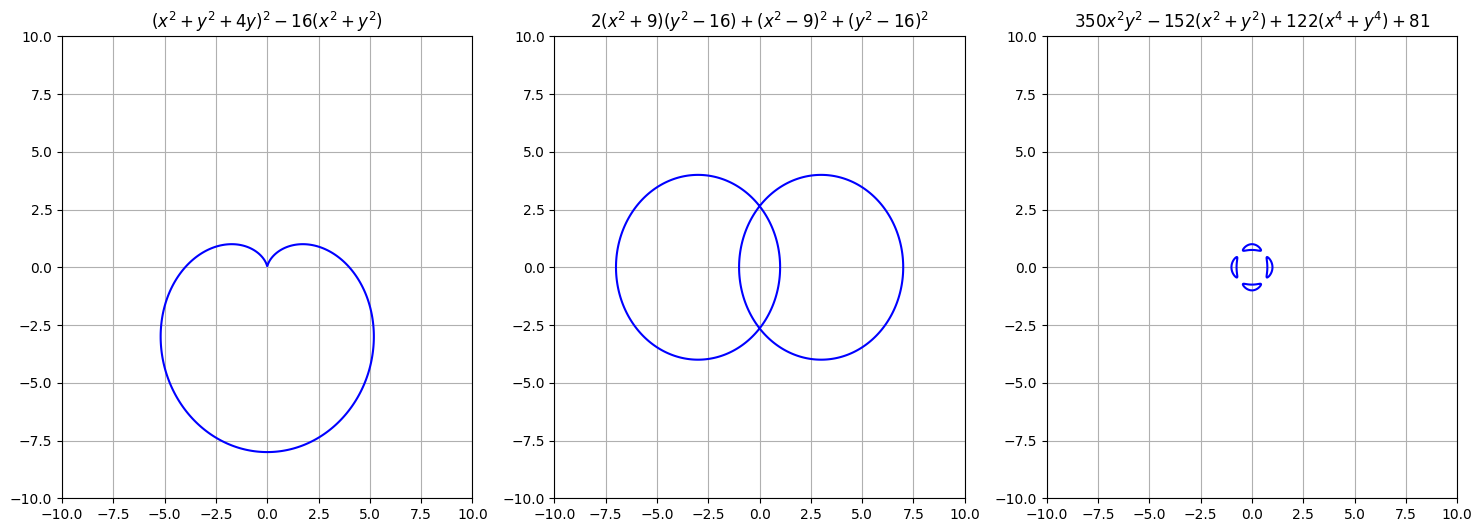

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x, y = sp.symbols("x y")

curve1 = (x**2 + y**2 + 4*y)**2 - 16 * (x**2 + y**2)
curve2 = 2 * (x**2 + 9) * (y**2 - 16) + (x**2 - 9)**2 + (y**2 - 16)**2
curve3 = 350 * x**2 * y**2 - 15**2 * (x**2 + y**2) + 12**2 * (x**4 + y**4) + 81

curves = [curve1, curve2, curve3]
singular_points = [find_singular_points(curve, (x, y)) for curve in curves]

for i, points in enumerate(singular_points):
    print(f"Singular points of curve{i+1}: {points}")


def plot_curve(curve, ax, range_lim=10):
    f_lambdified = sp.lambdify((x, y), curve, "numpy")
    X = np.linspace(-range_lim, range_lim, 1000)
    Y = np.linspace(-range_lim, range_lim, 1000)
    X, Y = np.meshgrid(X, Y)
    Z = f_lambdified(X, Y)
    ax.contour(X, Y, Z, levels=[0], colors="b")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax in axes:
    ax.grid(True)
axes[0].set_title(r"$(x^2 + y^2 + 4y)^2 - 16(x^2 + y^2)$")
axes[1].set_title(r"$2(x^2 + 9)(y^2 - 16) + (x^2 - 9)^2 + (y^2 - 16)^2$")
axes[2].set_title(r"$350x^2y^2 - 152(x^2 + y^2) + 122(x^4 + y^4) + 81$")

for i, curve in enumerate(curves):
    plot_curve(curve, axes[i])

plt.show();

## Exercise 10:

In [3]:
# (Pt 1):
import sympy as sp

u, v, x, y, z = sp.symbols("u v x y z")

equations = [x - u * v, y - v, z - u**2]

G = sp.groebner(equations, u, v, x, y, z, order="lex")
G

GroebnerBasis([u**2 - z, u*x - y*z, u*y - x, v - y, x**2 - y**2*z], u, v, x, y, z, domain='ZZ', order='lex')

**(Pt 1) Trzeci ideał eliminacyjny $I_2$:**

Mamy: $I = \langle u^2 - z, ux - yz, uy - x, v - y, x^2 - y^2z \rangle \subseteq k[u, v, x, y, z]$ 

Eliminujemy parametry: $\{u, v\}$ (jedynym równianiem niezawierającym tych parametrów jest $x^2 - y^2z $)

Zatem otrzymujemy: $I_2 = I \cap k[x, y, z] = \langle x^2 - y^2z  \rangle$

**(Pt 2):**

Równanie $x^2 - y^2z = 0$ ma częściowe rozwiązanie $(a, b, c)$ w $\mathbb{C}^3$

Musimy znaleźć $u$ oraz $v$, które spełniają pozostałe równania bazy Groebnera $I$

<br />

Weźmy $x^2 - y^2z$, które jest spełnione przez $(a, b, c)$. Wtedy $a^2 - b^2c \implies a^2 = b^2c$.

Z równania $v - y = 0$ otrzymujemy $v = y \implies v = b$

Następnie z równania $u^2 - z = 0$ otrzymujemy $u^2 = z \implies u^2 = c \implies u = \pm\sqrt{c}$

Dodatkowo z równania $uy - x = 0$ otrzymujemy $uy = x \implies ub = a \implies \pm b\sqrt{c} = a$

Zatem rozwiązania $(a, b, c)$ rozszerzają się do rozwiązań $(\pm\sqrt{c}, b, a, b, c)$ w $\mathbb{C}^5$

**(Pt 3):**

Dla $\mathbb{R}$ możemy rozszerzyć rozwiązanie $(a, b, c)$ do pełnego rozwiązania w $\mathbb{C}^5$ pod warunkiem, że $c \geq 0$.

Zatem musimy odrzucić rozwiązania postaći $(0, 0, c) : c < 0$

**(Pt 4):**

![](ex10/pt4_plot.png)

In [4]:
# (Pt 5):
# Requires find_singular_points definition from ex9

x, y, z = sp.symbols("x y z")
curve = x**2 - y**2 * z

print(f"Singular points of V(x^2 - y^2z): {find_singular_points(curve, (x, y, z))}")

Singular points of V(x^2 - y^2z): [{x: 0, y: 0}]


Alternatywnie możemy uzyskać punkty osobliwe tej krzywej, licząc pochodne cząstkowe:

$\frac{d}{dx}(x^2 - y^2z) = 2x$

$\frac{d}{dy}(x^2 - y^2z) = -2yz$

$\frac{d}{dz}(x^2 - y^2z) = -y^2$

Stąd otrzymujemy punkty osobliwe postaci $(0, 0, z) : z \in \mathbb{C}$

## Exercise 11:

Równanie okręgu: $x^2 + y^2 = r^2$, gdzie $r$ jest promieniem okręgu

Otrzymujemy zatem: 

$$
x(t)^2 + y(t)^2 = 
(\frac{1 - t^2}{1 + t^2})^2 + (\frac{2t}{1 + t^2})^2 = 
\frac{(1 - t^2)^2 + (2t)^2}{(1 + t^2)^2} = 
\frac{1 - 2t^2 +t^4 + 4t^2}{(1 + t^2)^2} =
\frac{1 + 2t^2 + t^4}{(1 + t^2)^2} =
\frac{(1 + t^2)^2}{(1 + t^2)^2} = 1
$$

Stąd równanie generowane implicite przez dane parametryczne to: $x^2 + y^2 - 1 = 0$

Uzyskany okrąg jednostkowy rózni się od opisu parametrycznego tym, że obraz parametryczny nie zawiera punktu $(-1, 0)$

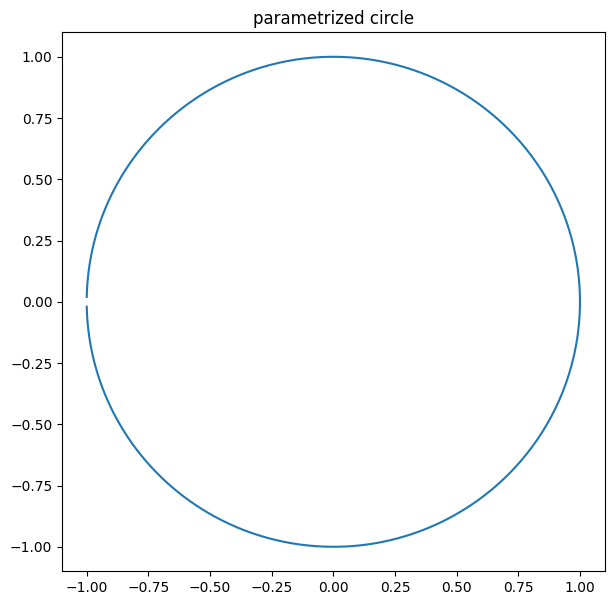

In [5]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(-100, 100, 10000)
theta_sq = theta ** 2

x = (1 - theta_sq) / (1 + theta_sq)
y = (2 * theta) / (1 + theta_sq)

plt.figure(figsize=(7, 7))
plt.plot(x, y)
plt.title("parametrized circle")
plt.show();

## Exercise 12:

Wiemy, że $x = r \cos{t} \land y = r \sin{t}$.

Możemy zatem podstawić te wartości do zadanego równania:

$r = \frac{1}{\cos{t}} + a \cos{t} \implies x = (\frac{1}{\cos{t}} + a \cos{t}) \cos{t} \implies x = 1 + a \cos^2{t} \implies \cos^2{t} = \frac{x - 1}{a}$

Analogicznie postępujemy dla $y$ i otrzymujemy $y = (\frac{1}{\cos{t}} + a \cos{t}) \sin{t}$

Oraz z jedynki trygonometrycznej wyznaczamy: $\sin^2{t} = 1 - \frac{x - 1}{a}$

In [6]:
from sympy import symbols, sqrt, simplify, expand

# Define the variables
x, y, a = symbols('x y a')

# Define the expressions
cos_t_squared = (x - 1) / a
sin_t_squared = (a + 1 - x) / a

cos_t = sqrt(cos_t_squared)
sin_t = sqrt(sin_t_squared)

y_eq = (1 / cos_t + a * cos_t) * sin_t

y_eq_squared = simplify(expand(y_eq**2))
y_eq_squared

x**2*(a - x + 1)/(x - 1)

Zatem: 

$$
y^2 = \frac{x^2(a - x + 1)}{x - 1} \\
y^2(x - 1) = x^2(a - x + 1) \\
y^2(x - 1) = ax^2 - x^3 + x^2 \\
y^2(x - 1) = ax^2 - x^2(x - 1) \\
y^2(x - 1) - ax^2 + x^2(x - 1) = 0 \\
(x - 1)(x^2 + y^2) - ax^2 = 0
$$

Otrzymaliśmy zatem krzywą algebraiczną stopnia trzeciego

![](ex12/parametric_plot_a_neg4.png)
![](ex12/parametric_plot_a_neg2.png)
![](ex12/parametric_plot_a0.png)
![](ex12/parametric_plot_a1.png)
![](ex12/parametric_plot_a2.png)
![](ex12/parametric_plot_a3.png)